In [1]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Import dependencies
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,extract, desc,func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
final_date = session.query(Measure.date,func.strftime('%Y',Measure.date),\
    func.strftime('%m',Measure.date),func.strftime('%d',Measure.date)).\
    order_by(Measure.date.desc()).first()
final_date

('2017-08-23', '2017', '08', '23')

In [10]:
# Calculate the date one year from the last date in data set.
# yearagodate = dt.date(2017,8,23) - dt.timedelta(days = 365)
year_ago_date = dt.date(int(final_date[1]),int(final_date[2]),int(final_date[3])) - dt.timedelta(days = 365)
print(year_ago_date)

2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measure.date, Measure.prcp).\
    filter(Measure.date>=(dt.date(int(final_date[1]),\
    int(final_date[2]),int(final_date[3])) - dt.timedelta(days = 365))).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipdf = pd.DataFrame(precip,columns = ['date','prcp'])
precipdf.set_index('date', inplace=True)

# Sort the dataframe by date
precprecipdfp = precipdf.sort_index(ascending = False)
precipdf.head(2)


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08


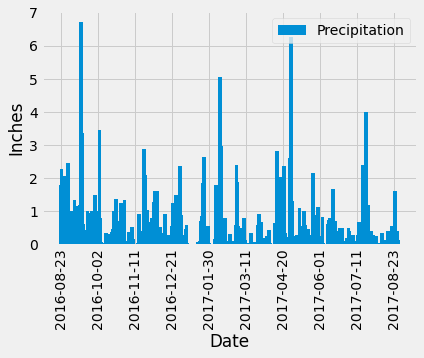

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.xticks(np.arange(0,365,40), rotation = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.bar(x = precipdf.index, height= precipdf['prcp'],label = 'Precipitation',width = 4)
plt.legend()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipdf.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measure.station).distinct().count()
station_count


9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order. 
station_active = session.query(Measure.station, func.count(Measure.station)).\
    group_by(Measure.station).order_by(func.count(Measure.station).desc()).all()
station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
#list the most active station
station_busiest = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).order_by(func.count(Measure.station).desc()).first()
station_busiest

('USC00519281', 2772)

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.  
station_busy = session.query(Measure.station, func.min(Measure.tobs),\
    func.max(Measure.tobs), func.avg(Measure.tobs)).\
    filter(Measure.station == station_busiest[0]).all()
station_busy

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [18]:
#retrieve latest date of the busiest station in useable formats
sbld = session.query(Measure.station,Measure.date,func.strftime('%Y',Measure.date),\
    func.strftime('%m',Measure.date),func.strftime('%d',Measure.date)).\
    filter(Measure.station == station_busiest[0]).order_by(Measure.date.desc()).first()
print(sbld)


('USC00519281', '2017-08-18', '2017', '08', '18')


In [19]:
#calculate the date a year from the latest date of the busiest station 
st_year_ago = dt.date(int(sbld[2]),int(sbld[3]),int(sbld[4])) - dt.timedelta(days = 365)
print(st_year_ago)


2016-08-18


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
st_year_data = session.query(Measure.station, Measure.date, Measure.tobs).\
    filter(Measure.station == sbld[0],\
        Measure.date>=(dt.date(int(sbld[2]),int(sbld[3]),int(sbld[4])) - dt.timedelta(days = 365))).all()
st_year_data

[('USC00519281', '2016-08-18', 80.0),
 ('USC00519281', '2016-08-19', 79.0),
 ('USC00519281', '2016-08-20', 81.0),
 ('USC00519281', '2016-08-21', 79.0),
 ('USC00519281', '2016-08-22', 78.0),
 ('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC005192

In [21]:
# create pandas dataframe
yeartemp = pd.DataFrame(st_year_data, columns = ['station','date','tobs'])
yeartemp.head(2)


,station,date,tobs
0,USC00519281,2016-08-18,80.0
1,USC00519281,2016-08-19,79.0


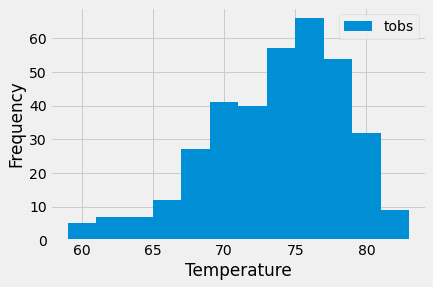

In [22]:
# plot the results as a histogram
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.hist(yeartemp.tobs,bins =12,label = 'tobs')
plt.legend()
plt.show()


# Close session

In [23]:
# Close Session
session.close()